In [9]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#load the dataset
filepath = 'airline_delay.csv'
data = pd.read_csv('airline_delay.csv')

#Data cleaning
#Removing the rows with Null values

print('With Null Values:', data.shape)
data = data.dropna()
print('Without Null Values:', data.shape)

With Null Values: (3351, 21)
Without Null Values: (3343, 21)


In [10]:
# Splitting the 'airport_name' column at the colon (':') and expanding the split into separate columns
data[['Airport_City', 'Airport_State']] = data['airport_name'].str.split(':', expand=True)

# Further process 'Airport_State' to trim any leading or trailing whitespace
data['Airport_State'] = data['Airport_State'].str.strip()

# Display the first few rows to check the new columns
print(data[['Airport_City', 'Airport_State']].head())

                     Airport_City                   Airport_State
0  Allentown/Bethlehem/Easton, PA     Lehigh Valley International
1                      Albany, GA      Southwest Georgia Regional
2                  Alexandria, LA        Alexandria International
3                     Augusta, GA  Augusta Regional at Bush Field
4                      Albany, NY            Albany International


In [11]:
# is there any null value
data.isnull().sum()  

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
Airport_City           0
Airport_State          0
dtype: int64

In [12]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,3343.000000,3343.0,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000,3343.00000,3343.000000,3343.000000
mean,2019.458271,12.0,298.271014,50.995214,16.065337,1.443144,16.183383,0.137320,17.166069,2.884535,0.575830,3333.868083,1144.763087,177.591385,749.57942,5.400838,1256.533353
std,0.498330,0.0,852.436335,146.484456,41.759516,4.821657,56.423008,0.646479,55.447043,10.126658,2.097884,10284.926623,3371.103512,734.343542,3190.50916,27.161402,4184.451426
min,2019.000000,12.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2019.000000,12.0,35.000000,5.000000,1.490000,0.000000,0.820000,0.000000,0.900000,0.000000,0.000000,230.000000,68.500000,0.000000,21.50000,0.000000,31.000000
50%,2019.000000,12.0,83.000000,12.000000,4.750000,0.060000,2.980000,0.000000,3.280000,0.000000,0.000000,746.000000,272.000000,3.000000,106.00000,0.000000,205.000000
75%,2020.000000,12.0,194.500000,33.000000,12.255000,1.010000,8.870000,0.000000,10.240000,2.000000,0.000000,2095.500000,830.500000,82.000000,362.00000,0.000000,724.000000
max,2020.000000,12.0,19713.000000,2289.000000,697.000000,89.420000,1039.540000,17.310000,819.660000,224.000000,42.000000,160383.000000,55215.000000,14219.000000,82064.00000,553.000000,75179.000000


In [13]:
# finding dublicates in data 
data.groupby(data.duplicated()).count()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Airport_City,Airport_State
False,3343,3343,3343,3343,3343,3343,3343,3343,3343,3343,...,3343,3343,3343,3343,3343,3343,3343,3343,3343,3343


In [14]:
#Saving the cleaned dataset
data.to_csv('cleaned_airline_delays.csv', index=False)


In [16]:
filepath = 'cleaned_airline_delays.csv'
data = pd.read_csv('cleaned_airline_delays.csv')
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Airport_City,Airport_State
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.00,...,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0,"Allentown/Bethlehem/Easton, PA",Lehigh Valley International
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.00,...,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0,"Albany, GA",Southwest Georgia Regional
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.00,...,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0,"Alexandria, LA",Alexandria International
3,2020,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",184.0,9.0,4.17,0.00,...,0.0,0.0,508.0,192.0,0.0,92.0,0.0,224.0,"Augusta, GA",Augusta Regional at Bush Field
4,2020,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",76.0,11.0,4.78,0.00,...,1.0,0.0,692.0,398.0,0.0,178.0,0.0,116.0,"Albany, NY",Albany International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2019,12,EV,ExpressJet Airlines LLC,AMA,"Amarillo, TX: Rick Husband Amarillo International",56.0,8.0,2.20,1.00,...,0.0,1.0,353.0,165.0,19.0,135.0,0.0,34.0,"Amarillo, TX",Rick Husband Amarillo International
3339,2019,12,EV,ExpressJet Airlines LLC,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",76.0,17.0,7.51,0.24,...,0.0,0.0,1880.0,1516.0,25.0,200.0,0.0,139.0,"Atlanta, GA",Hartsfield-Jackson Atlanta International
3340,2019,12,EV,ExpressJet Airlines LLC,AUS,"Austin, TX: Austin - Bergstrom International",7.0,1.0,0.00,0.48,...,0.0,0.0,96.0,0.0,46.0,50.0,0.0,0.0,"Austin, TX",Austin - Bergstrom International
3341,2019,12,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",12.0,1.0,0.00,0.00,...,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0,"Asheville, NC",Asheville Regional


In [17]:
#Finding percentage of delayed flight 
data_december_2019 = data[(data['year'] == 2019)]
data_december_2020 = data[(data['year'] == 2020)]

# Total number of flights and delayed flights for each year
total_flights_2019 = data_december_2019['arr_flights'].sum()
total_delays_2019 = data_december_2019['arr_del15'].sum()
total_flights_2020 = data_december_2020['arr_flights'].sum()
total_delays_2020 = data_december_2020['arr_del15'].sum()

# Percentage of delayed flights for each year
percentage_delayed_2019 = (total_delays_2019 / total_flights_2019) * 100
percentage_delayed_2020 = (total_delays_2020 / total_flights_2020) * 100

# Results
print(f"Percentage of Delayed Flights in 2019: {percentage_delayed_2019:.2f}%")
print(f"Percentage of Delayed Flights in 2020: {percentage_delayed_2020:.2f}%")

Percentage of Delayed Flights in 2019: 20.29%
Percentage of Delayed Flights in 2020: 11.72%


In [18]:
#Finding Total Delay time
total_delay_2019_hours = data[data['year'] == 2019]['arr_delay'].sum() / 60
print(f'Total delay time in 2019: {int(total_delay_2019_hours)} hours')

total_delay_2020_hours = data[data['year'] == 2020]['arr_delay'].sum() / 60
print(f'Total delay time in 2020: {int(total_delay_2020_hours)} hours')

Total delay time in 2019: 143073 hours
Total delay time in 2020: 42678 hours


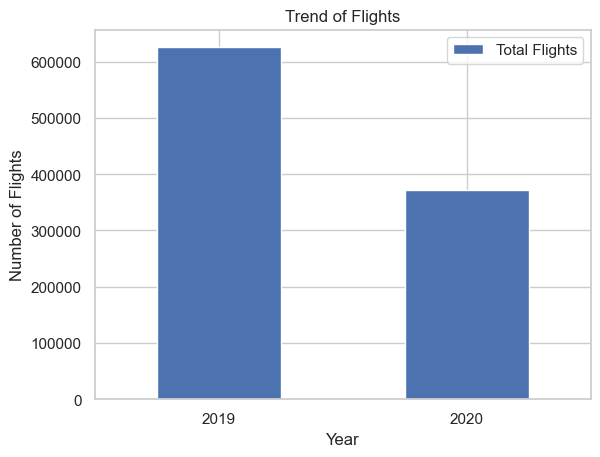

In [26]:
#Total number of flights

flight_trend = data.groupby(['year'])['arr_flights'].sum().plot(kind='bar')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of Flights')
plt.title('Trend of Flights')
plt.legend(['Total Flights'])
plt.grid(True)
plt.show()

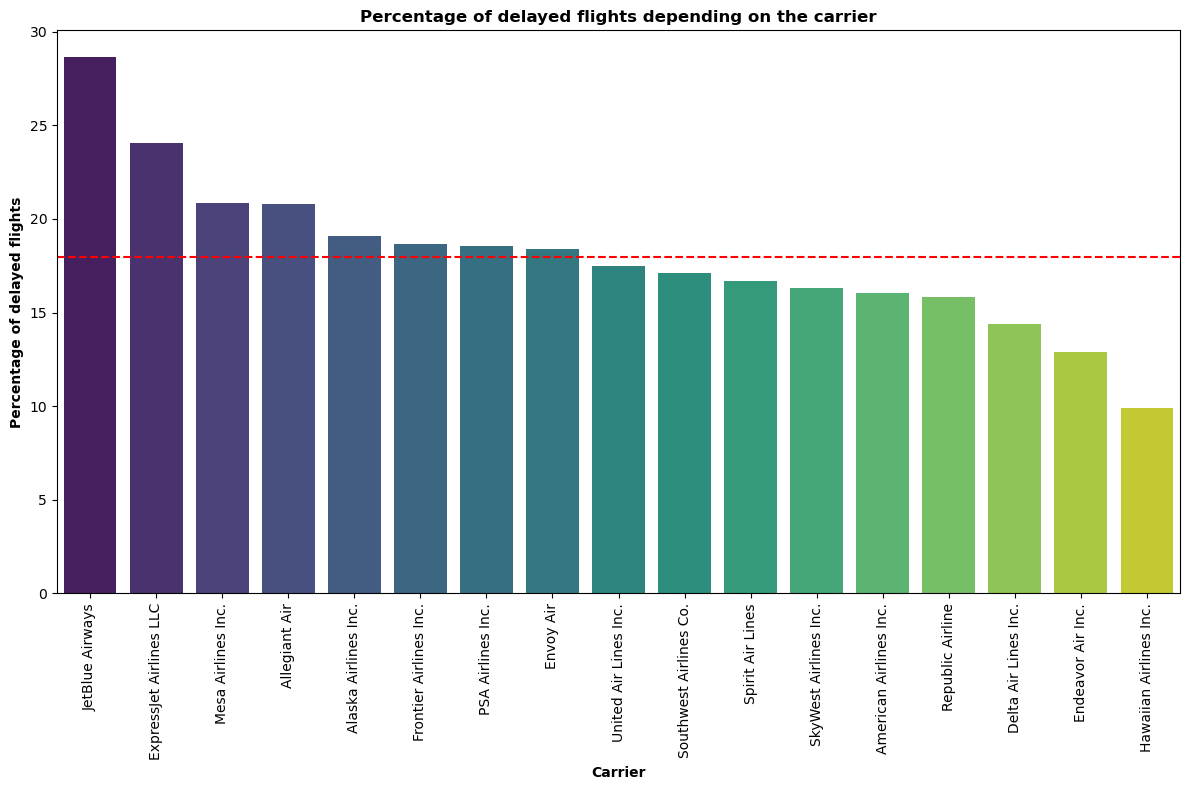

Mean Percentage of delayed flights: 17.98


In [19]:
#Flight Carries Performance and Comparison

data_carr = data[['carrier_name', 'arr_flights', 'arr_del15', 'arr_delay']].copy()

carrier_groups = data_carr.groupby('carrier_name')
carr_metrix = carrier_groups.agg({'arr_del15': 'sum','arr_delay': 'sum','arr_flights': 'sum'})

# Percentage of delayed flights
carr_metrix['Percentage_Delayed'] = (carr_metrix['arr_del15'] / carr_metrix['arr_flights']) * 100

# Average delay time
carr_metrix['Average_Delay_Time'] = carr_metrix['arr_delay'] / carr_metrix['arr_del15']

# Ranked data (based on percentage of delayed flights)
carrier_ranking = carr_metrix.sort_values(by='Percentage_Delayed', ascending=False)
carrier_ranking = pd.DataFrame(carrier_ranking)

plt.figure(figsize = (12,8))
sns.barplot(x=carrier_ranking.index, y=carrier_ranking['Percentage_Delayed'], palette = 'viridis')

# Horizontal line (overall average)
mean_perc_del = carrier_ranking['Percentage_Delayed'].mean()
plt.axhline(y=mean_perc_del, color='red', linestyle='--', label=f'Mean: {mean_perc_del:.2f}')


plt.title('Percentage of delayed flights depending on the carrier', fontweight = 'bold')
plt.ylabel('Percentage of delayed flights', fontweight = 'bold')
plt.xlabel('Carrier', fontweight = 'bold')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

print('Mean Percentage of delayed flights:', carrier_ranking['Percentage_Delayed'].mean().round(2))

C:\Users\bhama\AppData\Local\Temp\ipykernel_18196\1620357192.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=carrier_ranking.index, y='Average_Delay_Time', data=carrier_ranking, marker='o', palette='plasma')


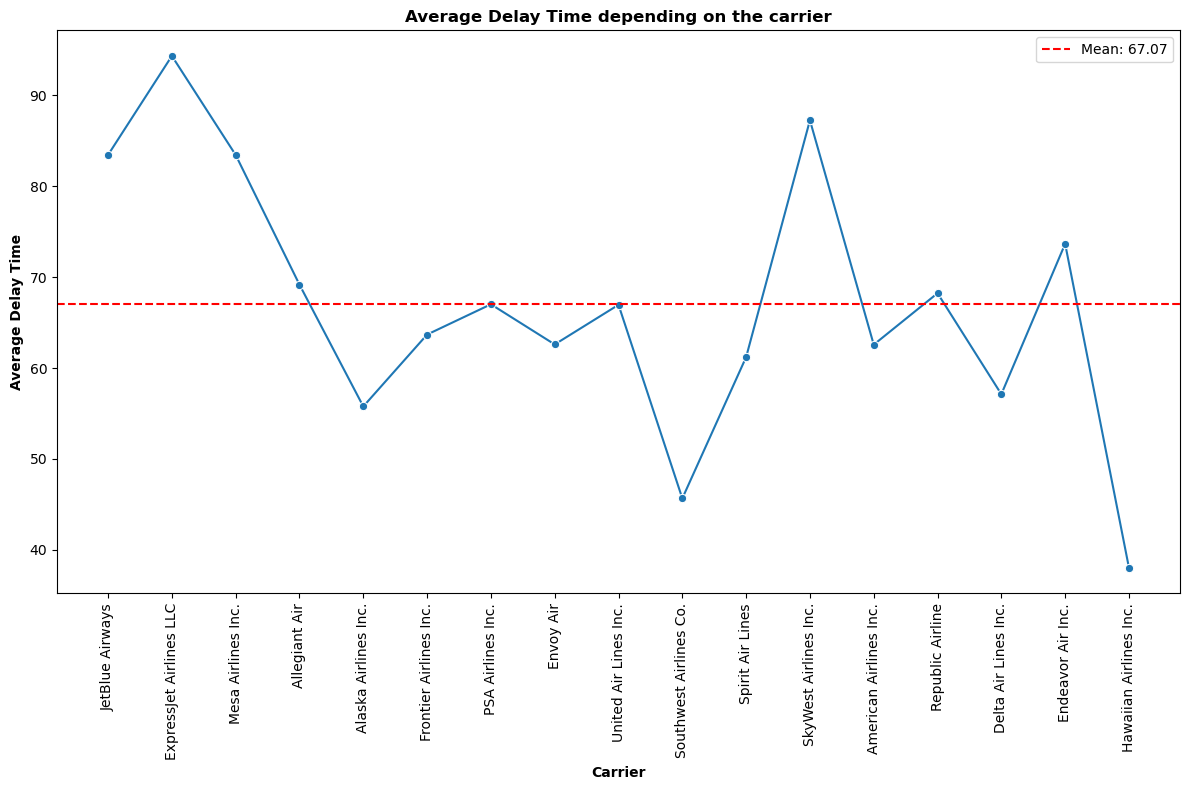

Overall Average Delay Time: 67.07


In [20]:
# Average delay time based on the Airport

#Average delay time based on Airline Carrier

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.lineplot(x=carrier_ranking.index, y='Average_Delay_Time', data=carrier_ranking, marker='o', palette='plasma')

# Adding the horizontal line for the overall average delay time
mean_avg_delay_time = carrier_ranking['Average_Delay_Time'].mean()
plt.axhline(y=mean_avg_delay_time, color='red', linestyle='--', label=f'Mean: {mean_avg_delay_time:.2f}')

plt.title('Average Delay Time depending on the carrier', fontweight='bold')
plt.ylabel('Average Delay Time', fontweight='bold')
plt.xlabel('Carrier', fontweight='bold')

plt.xticks(rotation=90)  # Makes carrier labels easier to read
plt.legend()  # To show the legend, if you've added labels
plt.tight_layout()
plt.show()

# Printing the overall average delay time
print('Overall Average Delay Time:', mean_avg_delay_time.round(2))


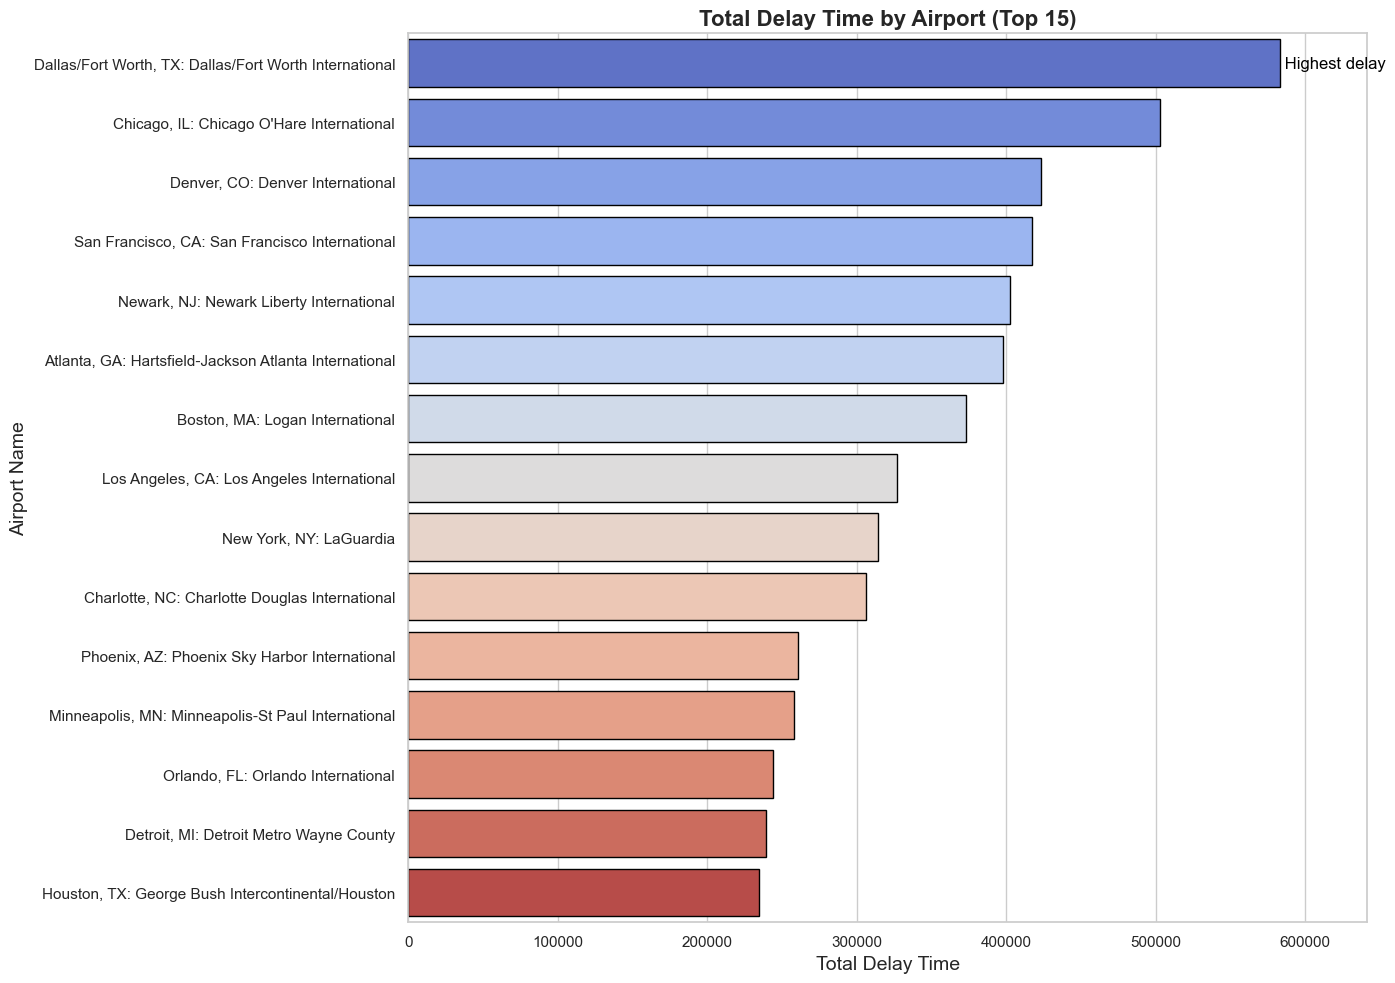

In [21]:
#Flight Delay based on Airport

airport_summary = data.groupby(['airport', 'airport_name']).agg(
    total_arrivals=('arr_flights', 'sum'),
    total_delay_time=('arr_delay', 'sum'),
    avg_carrier_delay=('carrier_delay', 'mean'),
    avg_weather_delay=('weather_delay', 'mean'),
    avg_nas_delay=('nas_delay', 'mean'),
    avg_security_delay=('security_delay', 'mean'),
    avg_late_aircraft_delay=('late_aircraft_delay', 'mean')
).reset_index().sort_values(by='total_delay_time', ascending=False)

top_15_airports = airport_summary.head(15)

# Set the visual appearance of Seaborn plots
sns.set_theme(style="whitegrid")

# Create a figure and a set of subplots
plt.figure(figsize=(14, 10))

# Create a horizontal bar chart using Seaborn, with a 'coolwarm' palette for visual appeal
sns.barplot(x='total_delay_time', y='airport_name', data=top_15_airports,
            palette='coolwarm', edgecolor='black')

# Add a title and labels to the chart
plt.title('Total Delay Time by Airport (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Total Delay Time', fontsize=14)
plt.ylabel('Airport Name', fontsize=14)

# Annotate the graph to indicate the highest delay
highest_delay = top_15_airports.iloc[0]
plt.text(highest_delay['total_delay_time'], 0, ' Highest delay', verticalalignment='center', fontsize=12, color='black')

# Optionally, you can adjust the limits of the x-axis to make space for annotations
plt.xlim(0, top_15_airports['total_delay_time'].max() * 1.1)

plt.tight_layout()
plt.show()


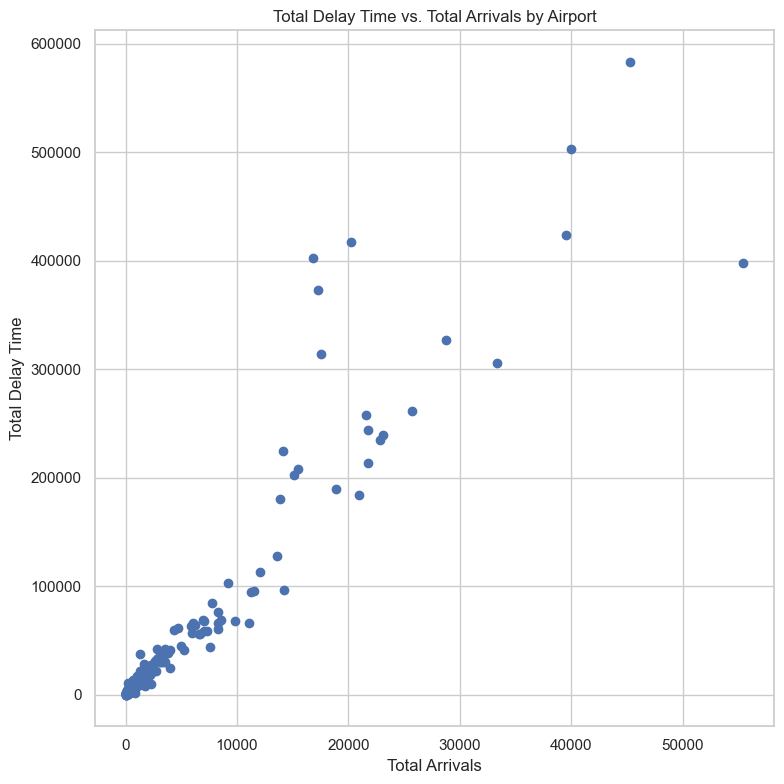

In [22]:
#Comparing Total Delay time and Total Arrival at the Airports

plt.figure(figsize=(8, 8))
plt.scatter(airport_summary['total_arrivals'], airport_summary['total_delay_time'])
plt.title('Total Delay Time vs. Total Arrivals by Airport')
plt.xlabel('Total Arrivals')
plt.ylabel('Total Delay Time')
plt.tight_layout()
plt.show()

In [23]:
#Delay Resons

data_delay = data[['weather_delay', 'security_delay', 'nas_delay', 'late_aircraft_delay']].copy()
display(data_delay)

,weather_delay,security_delay,nas_delay,late_aircraft_delay
0,0.0,0.0,3.0,30.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,45.0,28.0
3,0.0,0.0,92.0,224.0
4,0.0,0.0,178.0,116.0
...,...,...,...,...
3338,19.0,0.0,135.0,34.0
3339,25.0,0.0,200.0,139.0
3340,46.0,0.0,50.0,0.0
3341,0.0,0.0,23.0,0.0


In [27]:
significant_delay_threshold = 100  

significant_delays = data[data['arr_del15'] > significant_delay_threshold]
root_cause_summary = significant_delays[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
print("Root Causes of Significant Delays:")
print(root_cause_summary)

Root Causes of Significant Delays:
carrier_ct          33170.61
weather_ct           2871.50
nas_ct              38986.61
security_ct           319.73
late_aircraft_ct    40346.56
dtype: float64


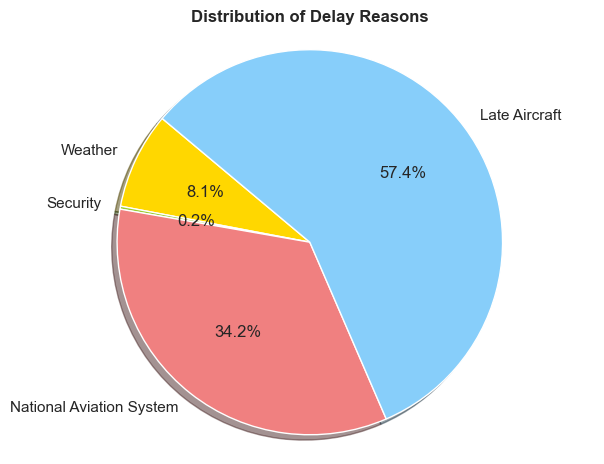

Late Aircraft               4200591
National Aviation System    2505844
Weather                      593688
Security                      18055
dtype: int32

In [24]:
delay_reasons = data_delay.sum()

# Renaming
delay_reasons = delay_reasons.rename(index={
    'weather_delay': 'Weather',
    'security_delay': 'Security',
    'nas_delay': 'National Aviation System',
    'late_aircraft_delay': 'Late Aircraft'
})

# Piechart
labels = delay_reasons.index
sizes = delay_reasons
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels = labels, colors = colors,  autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Delay Reasons', fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

display(delay_reasons.sort_values(ascending = False).astype(int))

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# 'arr_delay' is target variable
X = data[['arr_flights', 'arr_del15', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
y = data['arr_delay']

# First, remove any rows where the target variable 'y' is missing
rows_with_target = ~y.isna()
X_cleaned = X[rows_with_target]
y_cleaned = y[rows_with_target]

# Next, impute missing values in 'X_cleaned' with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_cleaned)

# Splitting the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_cleaned, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(f'R-squared: {r2_score(y_test, y_pred):.2f}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')

# Since 'X' was converted to a numpy array during imputation, column names are lost
# If you want to display the coefficients for each feature, ensure to keep track of the column names separately
feature_names = X_cleaned.columns
coefficients = pd.DataFrame(model.coef_, feature_names, columns=['Coefficient'])

# This is just for demonstration; replace this with your actual coefficients DataFrame
coefficients = pd.DataFrame({
    'Coefficient': [2.236145e-16, -1.656891e-14, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00],
}, index=['arr_flights', 'arr_del15', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])

# Dictionary mapping old parameter names to new, descriptive names
rename_dict = {
    'arr_flights': 'Number of flights arriving at airport',
    'arr_del15': 'Number of flights more than 15 minutes late',
    'carrier_delay': 'Number of flights delayed due to air carrier',
    'weather_delay': 'Number of flights due to weather',
    'nas_delay': 'Total time (minutes) of delay due to National Aviation System',
    'security_delay': 'Total time (minutes) of delay as a result of a security issue',
    'late_aircraft_delay': 'Total time (minutes) of delay flights as a result of a previous flight on the same airplane being late'
}

# Rename the index of the coefficients DataFrame using the dictionary
coefficients_renamed = coefficients.rename(index=rename_dict)

# Display the renamed coefficients DataFrame
print(coefficients_renamed)


R-squared: 1.00
Mean Squared Error: 0.00
                                                     Coefficient
Number of flights arriving at airport               2.236145e-16
Number of flights more than 15 minutes late        -1.656891e-14
Number of flights delayed due to air carrier        1.000000e+00
Number of flights due to weather                    1.000000e+00
Total time (minutes) of delay due to National A...  1.000000e+00
Total time (minutes) of delay as a result of a ...  1.000000e+00
Total time (minutes) of delay flights as a resu...  1.000000e+00
